<h3> Adaptive Boosting with Mushroom Dataset  </h3>

Given the variety of features on given mushrooms , there are 2 goals to achieve :

1. Prediction for poisionous v/s edible mushrooms.
    
2. Discussing a cautionary guidelines for people picking mushrooms.

<h3>Description for Data</h3>

<img src="https://imgs.search.brave.com/wZSZWupL0nW7bWjjK7X0Q1iiBrkIwlcgehXMlowQ2KI/rs:fit:500:0:0:0/g:ce/aHR0cHM6Ly9pbWFn/ZXMudW5zcGxhc2gu/Y29tL3Bob3RvLTE1/NzQwMjc2MTU5NjAt/YmQxMWM4MGJiNDc5/P2ZtPWpwZyZxPTYw/Jnc9MzAwMCZpeGxp/Yj1yYi00LjAuMyZp/eGlkPU0zd3hNakEz/ZkRCOE1IeHpaV0Z5/WTJoOE1UQjhmRzEx/YzJoeWIyOXRmR1Z1/ZkRCOGZEQjhmSHd3.jpeg" width="400" height="400">

### Mushroom Hunting: Edible or Poisonous?

Data Source: https://archive.ics.uci.edu/ml/datasets/Mushroom


This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.


Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y

4. bruises?: bruises=t,no=f

5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s

6. gill-attachment: attached=a,descending=d,free=f,notched=n

7. gill-spacing: close=c,crowded=w,distant=d

8. gill-size: broad=b,narrow=n

9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y

10. stalk-shape: enlarging=e,tapering=t

11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?

12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y

15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y

16. veil-type: partial=p,universal=u

17. veil-color: brown=n,orange=o,white=w,yellow=y

18. ring-number: none=n,one=o,two=t

19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z

20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y

21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y

22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('../Datasets/mushrooms.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [2]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Category Distribution and plotting

In [10]:
data.describe().transpose().reset_index().sort_values('unique')

,index,count,unique,top,freq
16,veil-type,8124,1,p,8124
0,class,8124,2,e,4208
4,bruises,8124,2,f,4748
6,gill-attachment,8124,2,f,7914
7,gill-spacing,8124,2,c,6812
8,gill-size,8124,2,b,5612
10,stalk-shape,8124,2,t,4608
18,ring-number,8124,3,o,7488
2,cap-surface,8124,4,y,3244
17,veil-color,8124,4,w,7924


In [11]:
feat_uniq_values = data.describe().transpose().reset_index().sort_values('unique')

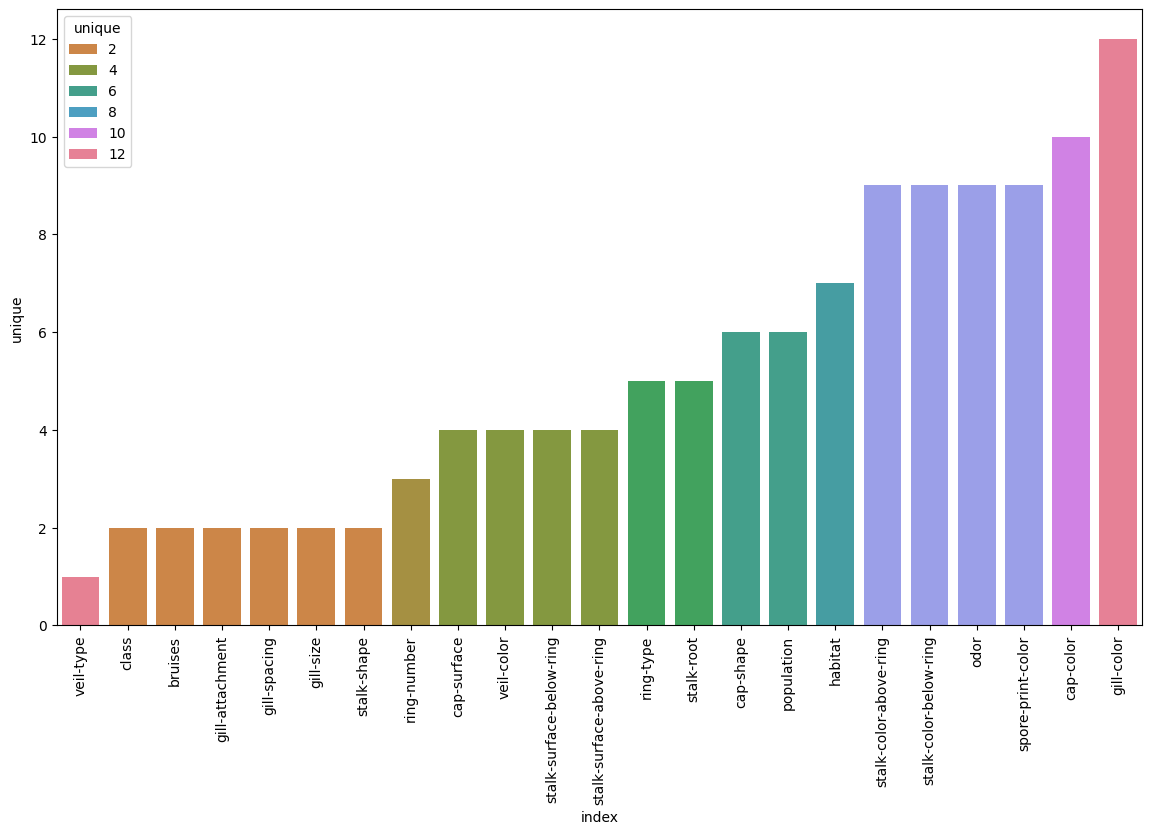

In [92]:
plt.figure(figsize=(14,8) , dpi=100)
sns.barplot(data=feat_uniq_values , x='index' , y='unique' , hue='unique' , palette='husl')
plt.xticks(rotation=90); # <- semicolon to disable the text info.

Plot for checking balance of posionous and edible classes of mushrooms in data

array(['p', 'e'], dtype=object)

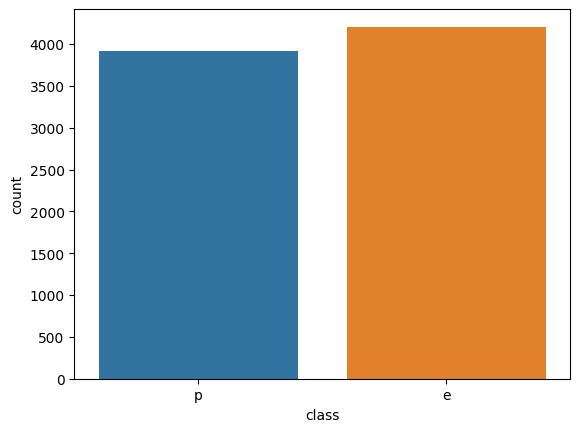

In [ ]:
sns.countplot(data=data , x='class' , hue='class')

Data Prepration

In [51]:
X = data.drop('class' , axis=1)
y = data['class']

# One-Hot Encoding features
X = pd.get_dummies(X , drop_first=True , dtype=int)

In [52]:
X

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Adaboost Classifier Model

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Experimenting with Adaboost
# Model = AdaBoostClassifier(n_estimators=1) does pretty well ( its only a single stump )
Model = AdaBoostClassifier(n_estimators=1)
Model.fit(X_train , y_train)

c:\Users\mohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=1)

In [1]:
from sklearn.metrics import classification_report , confusion_matrix , ConfusionMatrixDisplay

preds = Model.predict(X_test)

print("Classification Report : \n" , classification_report(y_test , preds))

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test , preds) , display_labels=Model.classes_).plot()
plt.show()

NameError: name 'Model' is not defined

In [61]:
# Figuring out what feature did the stump decided to be most informative
Model.feature_importances_ # the '1.' in the array is the feature we need

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
Model.feature_importances_.argmax() 
# Found that 22'nd feature of the dataset (one-hot encoded) which the stump is using

22

In [ ]:
X.columns[22] # feature where odor value is 'none' / 'n'

'odor_n'

<Axes: xlabel='odor', ylabel='count'>

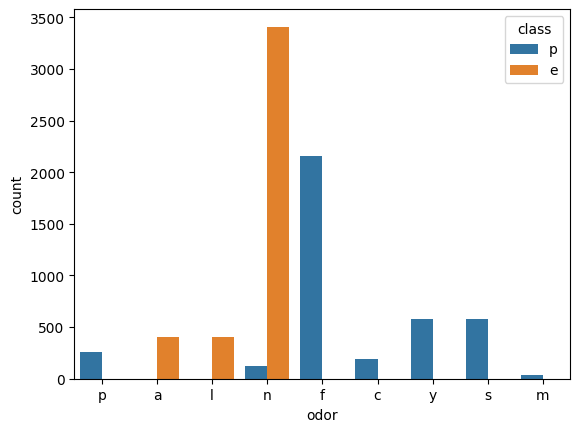

In [ ]:
sns.countplot(data=data , x='odor' , hue='class')
# Below plot can prove that mushrooms having odor 
# can be posionous.

Trying to experiment , how Adaboost acts with changes to range of values

In [73]:
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings(
action='ignore' , 
message='The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.'
)

error_rates = []

for x in range(1 , 96):
    mod = AdaBoostClassifier(n_estimators = x)
    mod.fit(X_train , y_train)
    preds = mod.predict(X_test)

    err = 1 - accuracy_score(y_test , preds)
    error_rates.append(err)

c:\Users\mohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\mohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\mohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\mohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is 

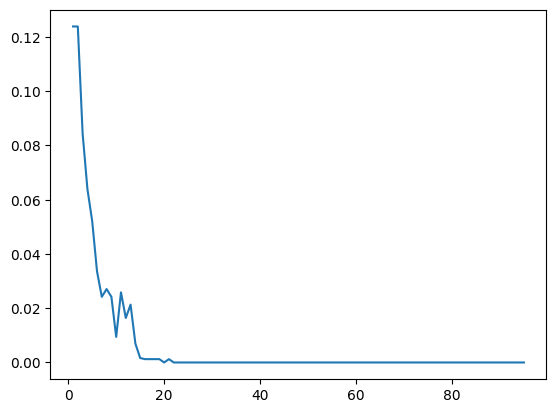

In [74]:
plt.plot(range(1 , 96) , error_rates)

Above graph shows that adding more estimators can settle the error rate to almost lowest possible. 

model with 95 estimators has lowest error rate possible.

But also more estimators numbers also lead to overfitting but unlike Random Forest Adaptive boost algorithm have low chances ( if happens then the estimator range is very high )

In [100]:
Final_model = AdaBoostClassifier(n_estimators=95).fit(X_train , y_train)

c:\Users\mohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [101]:
# Creating a Feature Importance Dataframe for 'Final_model'
Imp_features = pd.DataFrame(index=X.columns , data=Final_model.feature_importances_ , columns=['Importance'])
Imp_features = Imp_features[Imp_features['Importance'] > 0]

Imp_features

,Importance
cap-color_c,0.010526
cap-color_w,0.031579
bruises_t,0.010526
odor_c,0.031579
odor_f,0.031579
odor_n,0.063158
odor_p,0.021053
gill-spacing_w,0.094737
gill-size_n,0.084211
stalk-shape_t,0.031579


C:\Users\mohit\AppData\Local\Temp\ipykernel_4976\4045472376.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Imp_features.sort_values("Importance") , x=Imp_features.index , y='Importance' , palette='husl')


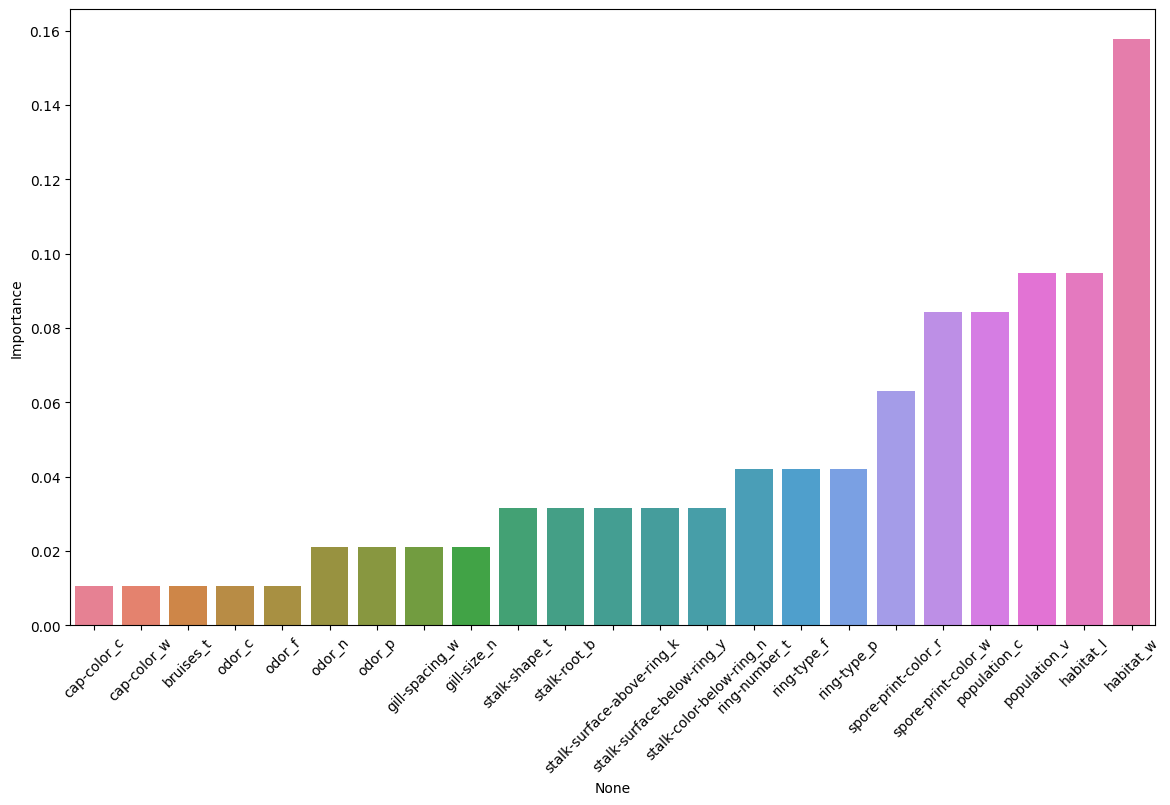

In [102]:
plt.figure(figsize=(14,8) , dpi=100)
sns.barplot(data=Imp_features.sort_values("Importance") , x=Imp_features.index , y='Importance' , palette='husl')
plt.xticks(rotation=45);

Above are the features that model actually considers

Experimenting with 10 estimators model

In [107]:
model = AdaBoostClassifier(n_estimators=10).fit(X_train , y_train)

c:\Users\mohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [108]:
Imp_features = pd.DataFrame(index=X.columns , data=model.feature_importances_ , columns=['Importance'])
Imp_features = Imp_features[Imp_features['Importance'] > 0]

Imp_features

,Importance
odor_f,0.1
odor_n,0.1
gill-size_n,0.2
stalk-shape_t,0.1
stalk-surface-above-ring_k,0.1
ring-type_p,0.1
spore-print-color_r,0.1
population_v,0.2


C:\Users\mohit\AppData\Local\Temp\ipykernel_4976\1503938429.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Imp_features.sort_values("Importance") , x=Imp_features.index , y='Importance' , palette='husl')


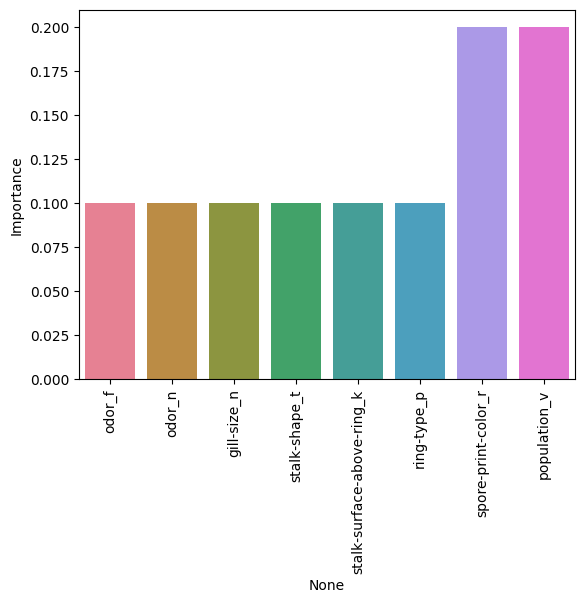

In [111]:
plt.figure(dpi=100)
sns.barplot(data=Imp_features.sort_values("Importance") , x=Imp_features.index , y='Importance' , palette='husl')
plt.xticks(rotation=90);